# Taylor's Series

Taylor series are a way to approximate a function around at some point $x_0$ by using a weighted sum of polynomials.

The polinomial is of degree _n_, the most number of term we include in the sum the better is the approximation.

We are interest to find coefficients $a_i$ of the form:

$P_n(x) = a_0 + a_1(x-x_0) + a_2(x-x_1)^2 + ... + a_n(x-x_0)^n$

To find the coefficients we must find the k-th derivative of the polynomial:

$P`(x) = a_1 + 2a_2(x-x_1) + ... + a_n(x-x_0)^n$

$P``(x) = 2a_2 + na_n(x-x_0)^{n-1}$

$P```(x) = n(n-1)a_n(x-x_0)^{n-2}$

$P^{n}(x) = n(n-1)a_n(x-x_0)^{n-3}$

$P^{(k)}_n(x) = a_k(k)! + a_{k+1}k(k-1)...2(x-x_0) + ... + \frac{n!a_n(x-x_0)^{n-k}}{(n-k)!}$

If we evaluate the k-th derivative of the polinomial $P^{k}_n$ at $x=x_0$, then as we can see:

$P^{(k)}_n(x) = a_k(k)! + a_{k+1}k(k-1)...2(x_0-x_0) + ... + \frac{n!a_n(x_0-x_0)^{n-k}}{(n-k)!}$

All the terms except the first one which doesn't deppends on x are 0 and we find the value of the $a_k$ coefficient when we state the following equality:

$P^{(k)}_n(x=x_0) = f^{(k)}_n(x=x_0) = a_k(k)!$

Since we are interested in the relationship between the k-th coefficient and the k-th derivative of the function to approximate:

$$
\begin{equation}
\boxed{
\begin{array}{rcl}
a_k = \frac{f^{(k)}_n(x_0)}{k!}
\end{array}
}
\end{equation}
$$

Now, if we substitute the value of the $a_k$ coefficients in the polynomial $P_n(x)$ we get the following weighted sum that deppends on the derivatives of the function valued at the point $x=x_0$:

$P_n(x) = a_0 + a_1f'(x_0)(x-x_0) + \frac{a_2f''(x_0)(x-x_0)^2}{2!} + ... + \frac{a_nf^{(n)}(x_0)(x-x_0)^n}{n!}$

Since we stated that the more terms in the polynomial the better the approximation:

$f(x) = \sum_{n=0}^{\infty}\frac{f^{(n)}(x-x_0)^n}{n!}$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Mathematical functions

def factorial(n: int):
    if n == 0:
        return 1
    return n * factorial(n - 1)

In [3]:
# Parameters of the sinusoidal function

f_0 = 1
T_0 = (2*np.pi)/f_0
phi = 0

t = np.linspace(0, 3*T_0, 100)

In [4]:
# Numerical derivative
def fdiff(x_n, k: int):
    if not type(k) == "int":
        raise ValueError("k must be an integer value")
    x_n = x_n.astype(np.float64)
    return np.diff(x_n, k)

In [5]:
def f_diff_k_at_x(f, x_n, k: int, x_0: float):
    pass

### Taylor Series using symbolic math

In [6]:
# Define the symbolic variables
x = sp.symbols("x")

f0 = 1/(2*np.pi)

# Define some functions to be aproximated
f1 = sp.exp(x)
f2 = sp.cos(2*np.pi*f0*x + phi)
f3 = sp.exp(-x) * f2
f4 = sp.log(x + 1)

f4

log(x + 1)

In [7]:
# Define the Taylor Series function
def get_symbolic_taylor(f, x: sp.core.symbol.Symbol, k: int, x_0: float):
    taylor = 0

    for n in range(k + 1):
        diff = sp.diff(f, x, n).subs(x, x_0)
        taylor += (diff * (x - x_0) ** n) / factorial(n)

    return taylor

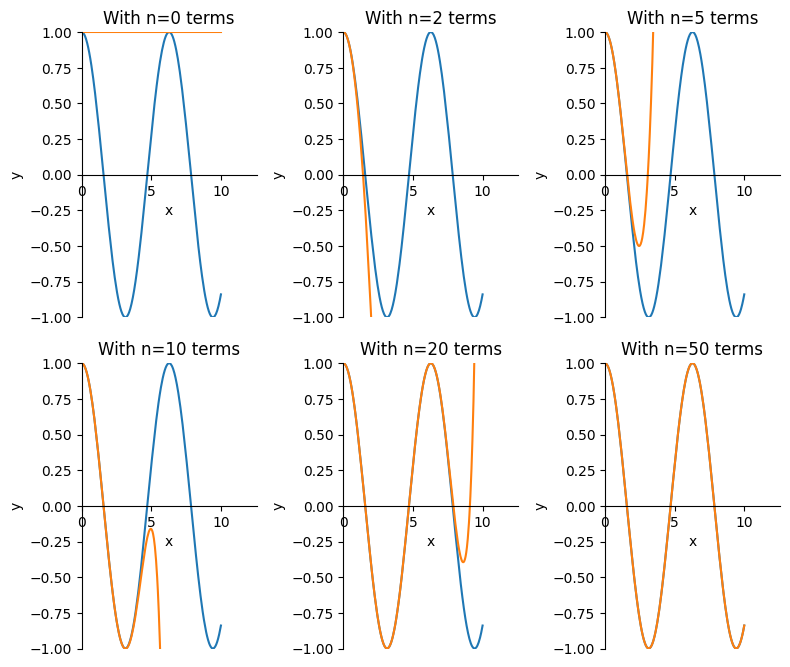

In [8]:
# List with number of terms to be used for the Taylor series aproximation
terms = [0, 2, 5, 10, 20, 50]

# Hold each individual plot to be shown in a grid
plots = []

for term in terms:
    f2_taylor = get_symbolic_taylor(f2, x, k=term, x_0=0)

    plot = sp.plot(f2, f2_taylor, show=False, title_fontsize=8)

    plot.title = f"With n={term} terms"

    plot.xlabel = "x"
    plot.ylabel = "y"
    plot.xlim = (0, 2*2*np.pi)
    plot.ylim = (-1, 1)
    
    plots.append(plot)


plot_grid = sp.plotting.PlotGrid(3, 3, *plots, show=False, size=(8, 10))

plot_grid.show()

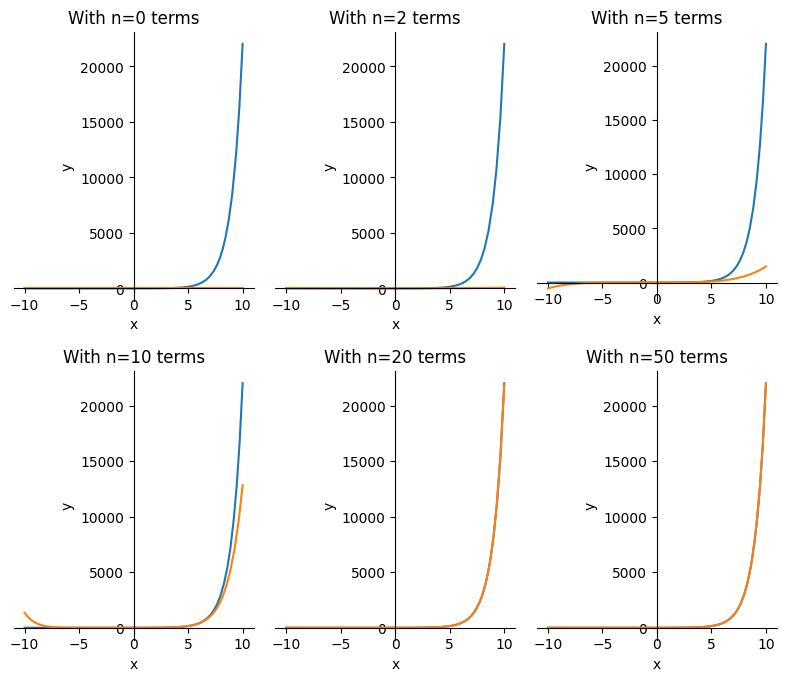

In [9]:
# List with number of terms to be used for the Taylor series aproximation
terms = [0, 2, 5, 10, 20, 50]

# Hold each individual plot to be shown in a grid
plots = []

for term in terms:
    f1_taylor = get_symbolic_taylor(f1, x, k=term, x_0=0)
    plot = sp.plot(f1, f1_taylor, show=False, title_fontsize=8)

    plot.title = f"With n={term} terms"

    plot.xlabel = "x"
    plot.ylabel = "y"
    
    plots.append(plot)


plot_grid = sp.plotting.PlotGrid(3, 3, *plots, show=False, size=(8, 10))

plot_grid.show()

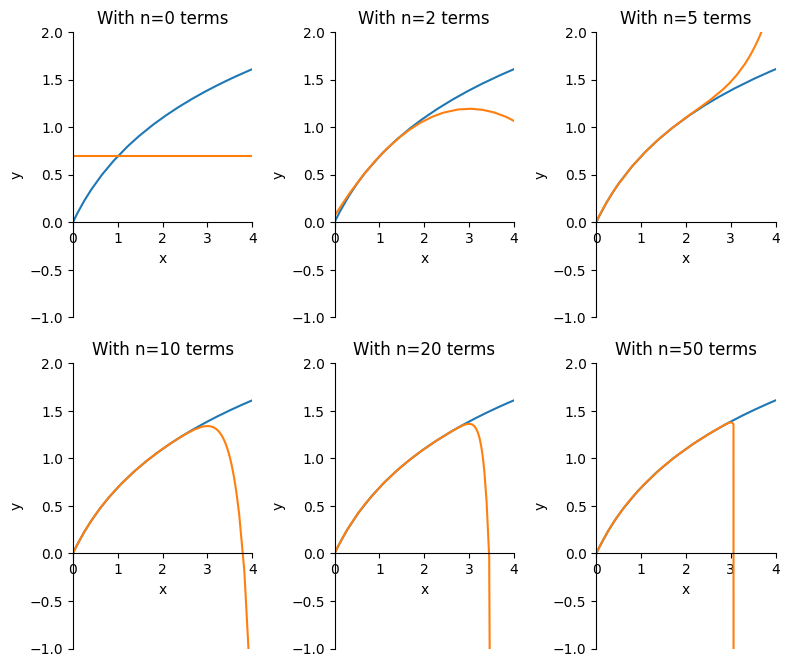

In [10]:
# List with number of terms to be used for the Taylor series aproximation
terms = [0, 2, 5, 10, 20, 50]

# Hold each individual plot to be shown in a grid
plots = []

for term in terms:
    f4_taylor = get_symbolic_taylor(f4, x, k=term, x_0=1)
    plot = sp.plot(f4, f4_taylor, show=False, title_fontsize=8)

    plot.title = f"With n={term} terms"

    plot.xlabel = "x"
    plot.ylabel = "y"
    plot.xlim = (0, 4)
    plot.ylim = (-1, 2)
    
    plots.append(plot)


plot_grid = sp.plotting.PlotGrid(3, 3, *plots, show=False, size=(8, 10))

plot_grid.show()

### Taylor Series using numeric computation

In [11]:
x = sp.symbols("x")

n = np.linspace(0, 10, 100)

In [105]:
# TODO: Fix this numerical implementation
def get_numerical_taylor(f, x, _n, n: int, x0: float):
    """
    Get the numerical Taylor Series approximation at the point x0

    Args:
        f (_type_): Symbolic function to be approximated
        x (_type_): Symbolic variable
        _n (NDArray): The array that represents the X-axis
        n (int): Degree of the Taylor Series
        x0 (float): Point at which the function will be approximated
    """
    taylor = np.zeros_like(_n)

    x_diff = f

    x_diff_x0 = 0

    for ni in range(n + 1):
        # The non zero coefficients are the function's derivative evaluated at x0
        if ni != 0:
            x_diff = x_diff.diff()
        
        # Convert the symbolic expression into a function
        x_diff_as_func = sp.lambdify(x, x_diff, "numpy")
        
        # Evaluate the function's derivative at the point x0
        x_diff_x0 = x_diff_as_func(x0)

        # Compute the polynomial of degree ni
        polynomial = np.power((_n - x0), ni)

        taylor += (x_diff_x0 * polynomial) / factorial(ni)

    return taylor

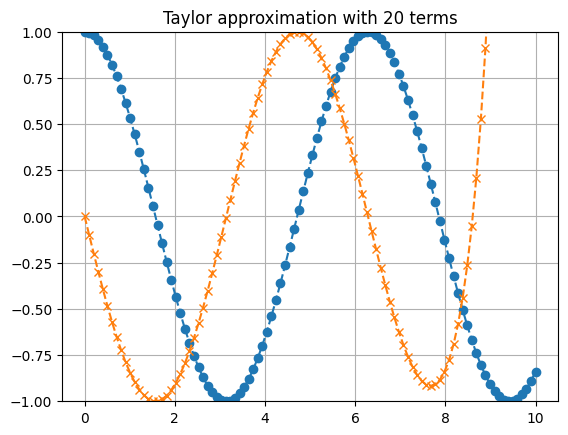

In [120]:
# Number of Taylor Series terms
ni = 20

cos_taylor = get_numerical_taylor(
    f=sp.cos(x),
    x=x,
    _n=n,
    n=ni,
    x0=0
)

plt.title(f"Taylor approximation with {ni} terms")

plt.plot(n, np.cos(n), "--o")
plt.plot(n, cos_taylor, "--x")

plt.xlabel = "t"
plt.ylabel = "x(t)"

plt.ylim((-1, 1))

plt.grid()